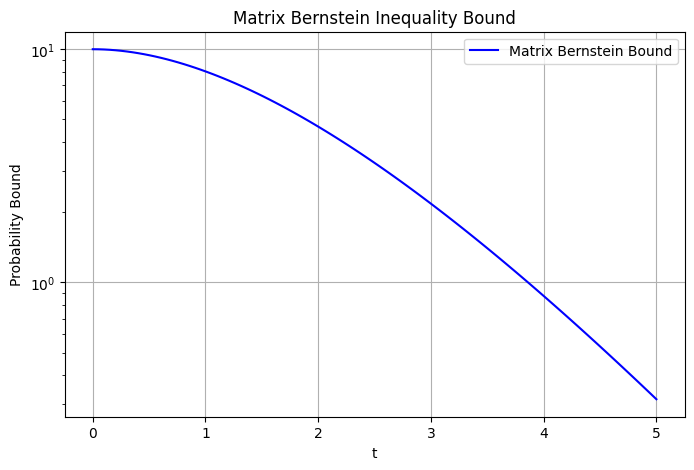

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_matrices(n, d, R):
    """Generate n independent d x d random matrices with bounded norm R."""
    X_matrices = [np.random.uniform(-R, R, (d, d)) for _ in range(n)]
    return X_matrices

def compute_variance_parameter(X_matrices):
    """Compute the matrix variance parameter."""
    n = len(X_matrices)
    d = X_matrices[0].shape[0]
    sum_xxt = sum(np.dot(X, X.T) for X in X_matrices) / n
    sum_xtx = sum(np.dot(X.T, X) for X in X_matrices) / n
    sigma_squared = max(np.linalg.norm(sum_xxt, ord=2), np.linalg.norm(sum_xtx, ord=2))
    return sigma_squared

def matrix_bernstein_bound(t, sigma_squared, R, d):
    """Compute the probability bound given by the Bernstein inequality."""
    return 2 * d * np.exp(-t**2 / (2 * (sigma_squared + R * t / 3)))

# Parameters
n = 100  # Number of matrices
d = 5    # Dimension of matrices
R = 1    # Bound on spectral norm

t_values = np.linspace(0, 5, 100)  # Range of t values for visualization

# Generate matrices and compute variance parameter
X_matrices = generate_random_matrices(n, d, R)
sigma_squared = compute_variance_parameter(X_matrices)

# Compute probability bound for different t values
prob_bounds = [matrix_bernstein_bound(t, sigma_squared, R, d) for t in t_values]

# Plot the probability bound
plt.figure(figsize=(8, 5))
plt.plot(t_values, prob_bounds, label='Matrix Bernstein Bound', color='blue')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('Probability Bound')
plt.title('Matrix Bernstein Inequality Bound')
plt.legend()
plt.grid()
plt.show()


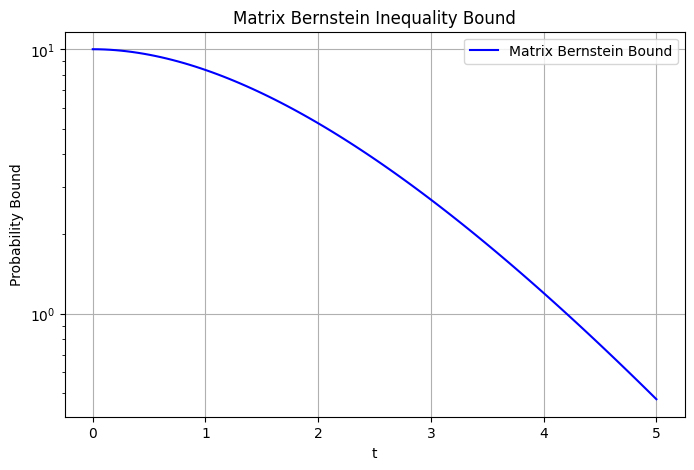

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def generate_random_matrices(n, d, R):
    """Generate n independent d x d random matrices based on graph edges with zero-mean Gaussian entries."""
    X_matrices = []
    for _ in range(n):
        G = nx.erdos_renyi_graph(d, 0.5)  # Generate a random graph
        X = np.zeros((d, d))
        for i, j in G.edges():
            value = np.random.normal(0, R)  # Zero-mean Gaussian distribution
            X[i, j] = value
            X[j, i] = value  # Ensure symmetry
        X_matrices.append(X)
    return X_matrices

def compute_variance_parameter(X_matrices):
    """Compute the matrix variance parameter."""
    n = len(X_matrices)
    d = X_matrices[0].shape[0]
    sum_xxt = sum(np.dot(X, X.T) for X in X_matrices) / n
    sum_xtx = sum(np.dot(X.T, X) for X in X_matrices) / n
    sigma_squared = max(np.linalg.norm(sum_xxt, ord=2), np.linalg.norm(sum_xtx, ord=2))
    return sigma_squared

def matrix_bernstein_bound(t, sigma_squared, R, d):
    """Compute the probability bound given by the Bernstein inequality."""
    return 2 * d * np.exp(-t**2 / (2 * (sigma_squared + R * t / 3)))

# Parameters
n = 100  # Number of matrices
d = 5    # Dimension of matrices
R = 1    # Standard deviation for Gaussian entries

t_values = np.linspace(0, 5, 100)  # Range of t values for visualization

# Generate matrices and compute variance parameter
X_matrices = generate_random_matrices(n, d, R)
sigma_squared = compute_variance_parameter(X_matrices)

# Compute probability bound for different t values
prob_bounds = [matrix_bernstein_bound(t, sigma_squared, R, d) for t in t_values]

# Plot the probability bound
plt.figure(figsize=(8, 5))
plt.plot(t_values, prob_bounds, label='Matrix Bernstein Bound', color='blue')
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('Probability Bound')
plt.title('Matrix Bernstein Inequality Bound')
plt.legend()
plt.grid()
plt.show()


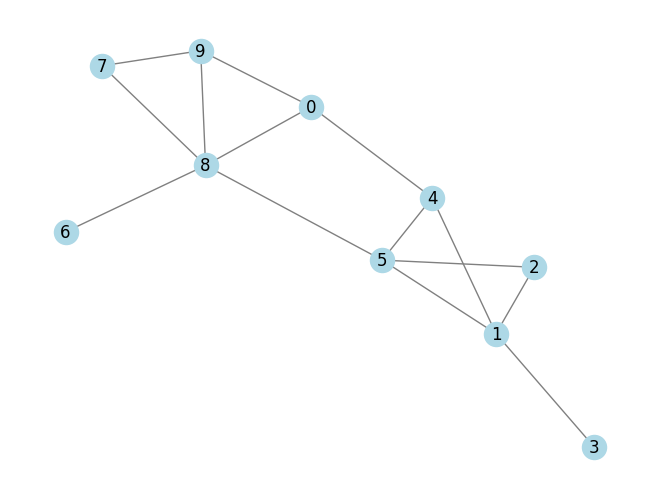

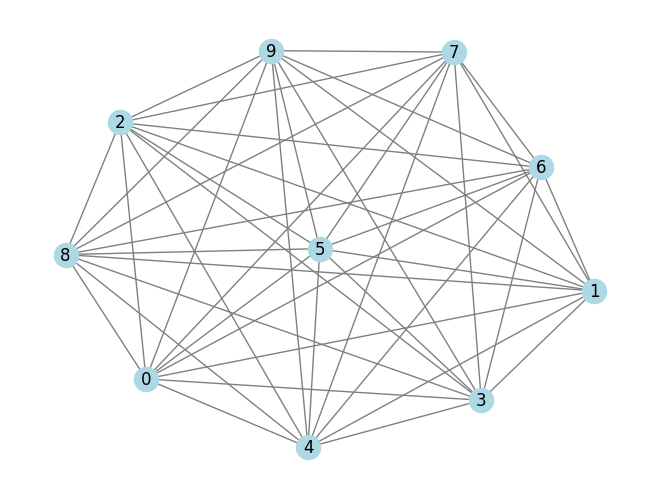

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 10  # Number of nodes
p = 0.2 # Probability of edge creation

# Generate Erdős–Rényi graph using G(n, p)
G = nx.erdos_renyi_graph(n, p)

# Draw the graph
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()


# Generate complete graph
G = nx.complete_graph(n)

# Draw the graph
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()